## Goal: Analyze the correlations between the factors we have created and the anisotropy matrix generated from the polarized spectra 

In [541]:
import os
import sys
import json

sys.path.append(os.path.abspath(".."))
import helpers  # Import the helpers module from the parent directory
import analysis_helpers # Import the analysis_helpers module from directory

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

import importlib
importlib.reload(helpers) 
importlib.reload(analysis_helpers)

pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.width")
pd.reset_option("display.max_colwidth")

# Standardizing Plots
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.loc'] = 'upper left'
plt.rcParams['legend.fancybox'] = True
plt.rcParams['figure.figsize'] = (10, 6)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'

### Factor Dictionary Paths

In [542]:
#Read in file and turn it into a dataframe

Cr_data_path = "Cr_data/Cr_fd_3_10_2025"
Cr_oxide_data_path = "Cr_oxide_data/Cr_oxide_fd_4_2_2025"
Cu_data_path = "Cu_data/Cu_fd_2_24_2025"
Fe_data_path = "Fe_data/Fe_fd_2_24_2025"

test_for_big_dataset = "../transformed_data/test_for_big_dataset/factor_df_6_7_2025"

#### Generate Factor and Spectra DF

In [543]:
normalization_orders = [7] #Specifys the normalization factors for DM QM and S

factor_df, spectra_df = helpers.generate_factor_sam_df(test_for_big_dataset, mat_props = True, dipole = True, quadrupole = True, steinhart=True, normalization_orders=normalization_orders, ox = False, spectra = True)

# Display the DataFrame
print(factor_df.head())
print(factor_df.shape[0])


           chemical_formula cif_name central_atom  space_group_number  \
material                                                                
mp-1518805       NdEuHfCrO6  unknown           Cr                 216   
mp-2218121       MgCr(WO4)2  unknown           Cr                   1   
mp-755220        Li3CrNi3O8  unknown           Cr                  12   
mp-1183696           CrCuO3  unknown           Cr                 221   
mp-1183712           CrGeO3  unknown           Cr                 221   

            average_bond_length  bond_length_std  average_bond_angle  \
material                                                               
mp-1518805                    0                0                   0   
mp-2218121                    0                0                   0   
mp-755220                     0                0                   0   
mp-1183696                    0                0                   0   
mp-1183712                    0                0        

Drop chemical info

In [544]:
factor_df = factor_df.drop(columns = ["average_bond_length", "bond_length_std", "average_bond_angle", "bond_angle_std", "number_of_unique_ligands"])

Clean data 

In [545]:
factor_df, spectra_df, dropped_factor_df = helpers.align_dataframes(factor_df, spectra_df)

Dropped duplicate indices:
Empty DataFrame
Columns: [chemical_formula, cif_name, central_atom, space_group_number, average_electronegativity, std_electronegativity, band_gap, density, oxidation_states, dam_1/^7_0, dam_1/^7_1, dam_1/^7_2, dam_1/^7_3, dam_1/^7_4, dam_1/^7_5, dam_1/^7_6, dam_1/^7_7, dam_1/^7_8, dams_1/r^7, qam_1/^7_0, qam_1/^7_1, qam_1/^7_2, qam_1/^7_3, qam_1/^7_4, qam_1/^7_5, qam_1/^7_6, qam_1/^7_7, qam_1/^7_8, qams_1/r^7, steinhart_vector_0, steinhart_vector_sum]
Index: []

[0 rows x 31 columns]

Dropped due to NaN entries:
Empty DataFrame
Columns: [chemical_formula, cif_name, central_atom, space_group_number, average_electronegativity, std_electronegativity, band_gap, density, oxidation_states, dam_1/^7_0, dam_1/^7_1, dam_1/^7_2, dam_1/^7_3, dam_1/^7_4, dam_1/^7_5, dam_1/^7_6, dam_1/^7_7, dam_1/^7_8, dams_1/r^7, qam_1/^7_0, qam_1/^7_1, qam_1/^7_2, qam_1/^7_3, qam_1/^7_4, qam_1/^7_5, qam_1/^7_6, qam_1/^7_7, qam_1/^7_8, qams_1/r^7, steinhart_vector_0, steinhart_vector_su

Check the cleaning and alligning

In [546]:
print("factor_df")
print(factor_df.head(5))
print(factor_df.tail(5))
print("anisotropy_matrix_df")
print(spectra_df.head(5))
print(spectra_df.tail(5))
print(factor_df.shape[0])
print(spectra_df.shape[0])

factor_df
           chemical_formula cif_name central_atom  space_group_number  \
material                                                                
mp-1024044          Mg3CrO4  unknown           Cr                 221   
mp-1030818        NaMg6CrO8  unknown           Cr                 123   
mp-1030883        Mg6CrSiO8  unknown           Cr                 123   
mp-1031027        LiMg6CrO8  unknown           Cr                 123   
mp-1031245         KMg6CrO8  unknown           Cr                 123   

            average_electronegativity  std_electronegativity  band_gap  \
material                                                                 
mp-1024044                   2.415827               1.032000    0.0000   
mp-1030818                   2.374282               1.075373    2.1237   
mp-1030883                   2.429485               1.023459    2.0172   
mp-1031027                   2.373261               1.070004    2.5121   
mp-1031245                   2.437

In [547]:
#pd.set_option("display.max_rows", None)    # Show all rows
#pd.set_option("display.max_columns", None) # Show all columns
#pd.set_option("display.width", None)       # Don't wrap lines
#pd.set_option("display.max_colwidth", None) # Show full column content
print(dropped_factor_df)
print(dropped_factor_df.shape[0])

Empty DataFrame
Columns: [chemical_formula, cif_name, central_atom, space_group_number, average_electronegativity, std_electronegativity, band_gap, density, oxidation_states, dam_1/^7_0, dam_1/^7_1, dam_1/^7_2, dam_1/^7_3, dam_1/^7_4, dam_1/^7_5, dam_1/^7_6, dam_1/^7_7, dam_1/^7_8, dams_1/r^7, qam_1/^7_0, qam_1/^7_1, qam_1/^7_2, qam_1/^7_3, qam_1/^7_4, qam_1/^7_5, qam_1/^7_6, qam_1/^7_7, qam_1/^7_8, qams_1/r^7, steinhart_vector_0, steinhart_vector_sum]
Index: []

[0 rows x 31 columns]
0


Compute normed spacegroup number

In [548]:
factor_df = helpers.compute_normed_spacegroup_number(factor_df)

print(factor_df)


           chemical_formula cif_name central_atom  space_group_number  \
material                                                                
mp-1024044          Mg3CrO4  unknown           Cr                 221   
mp-1030818        NaMg6CrO8  unknown           Cr                 123   
mp-1030883        Mg6CrSiO8  unknown           Cr                 123   
mp-1031027        LiMg6CrO8  unknown           Cr                 123   
mp-1031245         KMg6CrO8  unknown           Cr                 123   
...                     ...      ...          ...                 ...   
mp-798760     CrH10S2(NO2)4  unknown           Cr                   2   
mp-801251       VCrP2(O4F)2  unknown           Cr                   2   
mp-849774          V16CrO41  unknown           Cr                  25   
mp-866101            AcCrO3  unknown           Cr                 221   
mp-996996            CrAuO2  unknown           Cr                 166   

            average_electronegativity  std_electro

Sum anisotropy matrix elements

In [549]:
spectra_df = helpers.compute_off_diagonal_sum(spectra_df, normalize=True)

print(spectra_df)


            sam_m00       sam_m01   sam_m02       sam_m10  sam_m11  \
material                                                             
mp-1024044      0.0  4.703233e-06  0.000005  4.703233e-06      0.0   
mp-1030818      0.0  1.708919e-07  0.051754  1.708919e-07      0.0   
mp-1030883      0.0  1.850886e-07  0.035395  1.850886e-07      0.0   
mp-1031027      0.0  1.362048e-07  0.034190  1.362048e-07      0.0   
mp-1031245      0.0  1.706878e-07  0.042011  1.706878e-07      0.0   
...             ...           ...       ...           ...      ...   
mp-798760       0.0  6.880188e-02  0.068837  6.880188e-02      0.0   
mp-801251       0.0  6.292841e-02  0.059548  6.292841e-02      0.0   
mp-849774       0.0  8.021089e-02  0.084569  8.021089e-02      0.0   
mp-866101       0.0  4.072945e-07  0.000004  4.072945e-07      0.0   
mp-996996       0.0  3.315647e-02  0.033157  3.315647e-02      0.0   

                 sam_m12   sam_m20       sam_m21  sam_m22      sams  
material           

### Set SAMS to zero if less then cutoff

In [550]:
def zero_below_cutoff(df, column, cutoff):
    """
    Sets values in `column` less than `cutoff` to zero, in a copy of the DataFrame.

    Args:
        df (pd.DataFrame): Input DataFrame.
        column (str): Name of the column to threshold.
        cutoff (float): Cutoff value.

    Returns:
        pd.DataFrame: Modified DataFrame with values < cutoff set to zero in `column`.
    """
    df_copy = df.copy()
    df_copy.loc[df_copy[column] < cutoff, column] = 0
    return df_copy

spectra_df = zero_below_cutoff(spectra_df, "sams", 1e-4)

Compute the Aniso DM and QM sum for each normalization

In [551]:
# Create a dictionary to hold the new calculated columns
aniso_qm_dm_sum = {}

for n in normalization_orders:
    for m in normalization_orders:
        aniso_qm_dm_sum[f"dams_1/r^{m}_qams_1/r^{n}"] = factor_df[f"dams_1/r^{m}"] + factor_df[f"qams_1/r^{n}"]

# Convert the dictionary to a DataFrame
aniso_qm_dm_sum_df = pd.DataFrame(aniso_qm_dm_sum)

# Efficiently combine with the original DataFrame
factor_df = pd.concat([factor_df, aniso_qm_dm_sum_df], axis=1)


In [552]:
print(factor_df.columns.tolist())

['chemical_formula', 'cif_name', 'central_atom', 'space_group_number', 'average_electronegativity', 'std_electronegativity', 'band_gap', 'density', 'oxidation_states', 'dam_1/^7_0', 'dam_1/^7_1', 'dam_1/^7_2', 'dam_1/^7_3', 'dam_1/^7_4', 'dam_1/^7_5', 'dam_1/^7_6', 'dam_1/^7_7', 'dam_1/^7_8', 'dams_1/r^7', 'qam_1/^7_0', 'qam_1/^7_1', 'qam_1/^7_2', 'qam_1/^7_3', 'qam_1/^7_4', 'qam_1/^7_5', 'qam_1/^7_6', 'qam_1/^7_7', 'qam_1/^7_8', 'qams_1/r^7', 'steinhart_vector_0', 'steinhart_vector_sum', 'normed_space_group_number', 'dams_1/r^7_qams_1/r^7']


### Analyze correlations using Ordinary Least Squares (OLS)

In [553]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error


columns_to_use_1 = [
    "dams_1/r^7_qams_1/r^7", "dams_1/r^7", "qams_1/r^7",
    "dam_1/^7_1", "dam_1/^7_2", "dam_1/^7_5",
    "qam_1/^7_1", "qam_1/^7_2", "qam_1/^7_5",
    "band_gap", "density", "average_electronegativity", "normed_space_group_number"
]


columns_to_use = columns_to_use_1

X = factor_df[columns_to_use]

# Declare y
y = spectra_df["sams"]

# Ensure X and y are aligned
X, y = X.align(y, axis=0)

# Convert all data to numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Add a constant to X for the intercept
X = sm.add_constant(X)

# Drop any rows with NaN values in X or y
X = X.dropna()
y = y.loc[X.index]  # Ensure the index alignment is maintained

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

y_pred = results.predict(X)

print(y_pred)

print(y_pred["mp-1024044"])

material
mp-1024044    0.020966
mp-1030818    0.296600
mp-1030883    0.164314
mp-1031027    0.232617
mp-1031245    0.166905
                ...   
mp-798760     0.686504
mp-801251     0.791561
mp-849774     0.379474
mp-866101     0.001609
mp-996996     0.112735
Length: 269, dtype: float64
0.02096616062864069


In [554]:
from sklearn.metrics import mean_absolute_percentage_error

# Print the R-squared value
print(f"R-squared: {results.rsquared}")

#Mean Squared Error
mse = np.mean((results.resid) ** 2)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(y, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

R-squared: 0.7964204899067698
Mean Squared Error: 0.005083355392875946
Mean Absolute Error (MAE): 0.0454
Mean Absolute Percentage Error (MAPE): 17214401559892.9805


#### Plot the predicted against actual for Highest Rsquared

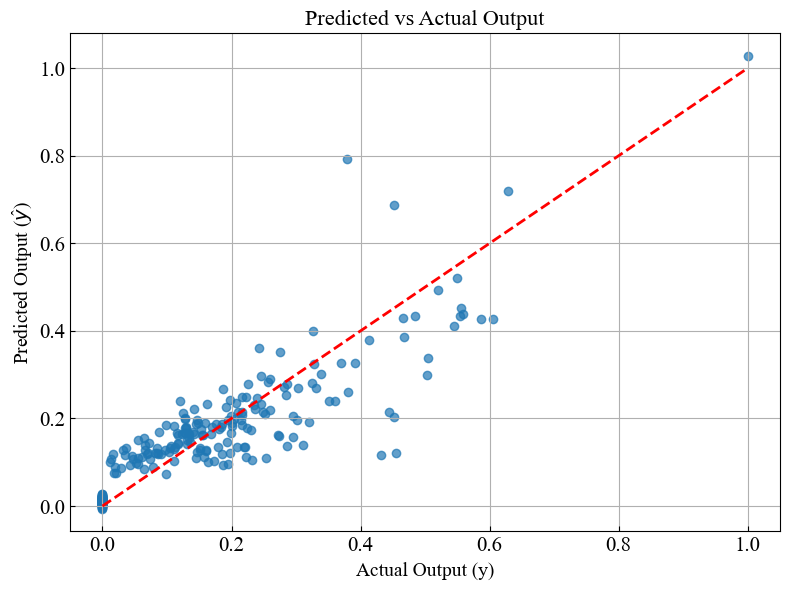

In [555]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Output (y)", fontsize=14)
plt.ylabel("Predicted Output ($\hat{y}$)", fontsize=14)
plt.title("Predicted vs Actual Output", fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()

## Look at the smallest y_true values 

In [556]:
print(y.sort_values(ascending=False))

material
mp-1446049    1.000000
mp-1040803    0.628731
mp-2220526    0.605244
mp-2226857    0.586294
mp-2225595    0.558259
                ...   
mp-1519529    0.000000
mp-1519575    0.000000
mp-1519678    0.000000
mp-1519687    0.000000
mp-1516437    0.000000
Name: sams, Length: 269, dtype: float64


## Analyze the outliers

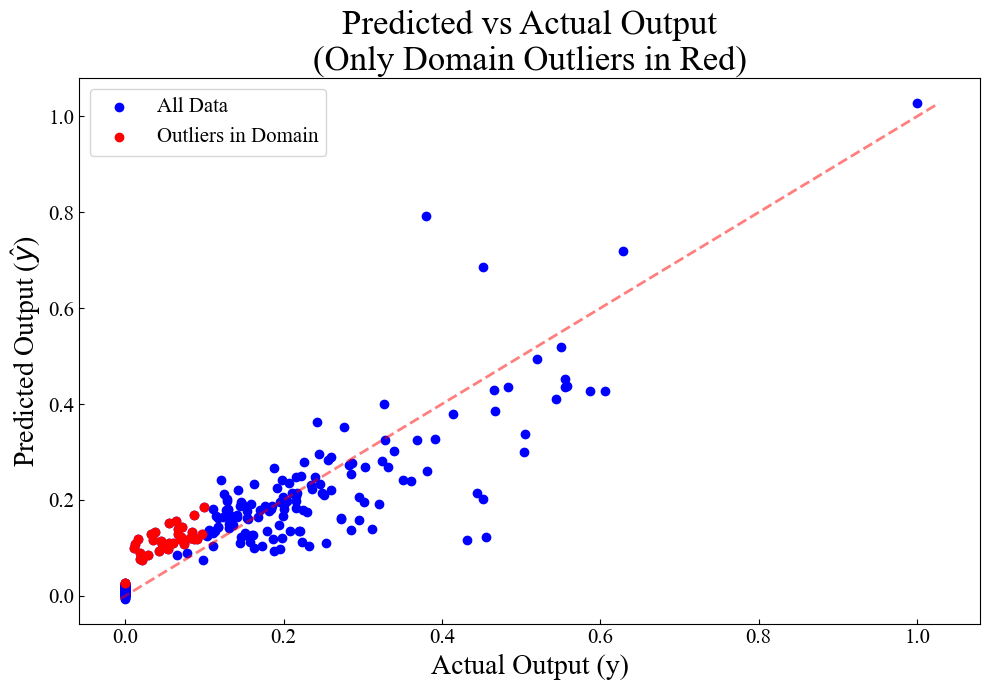

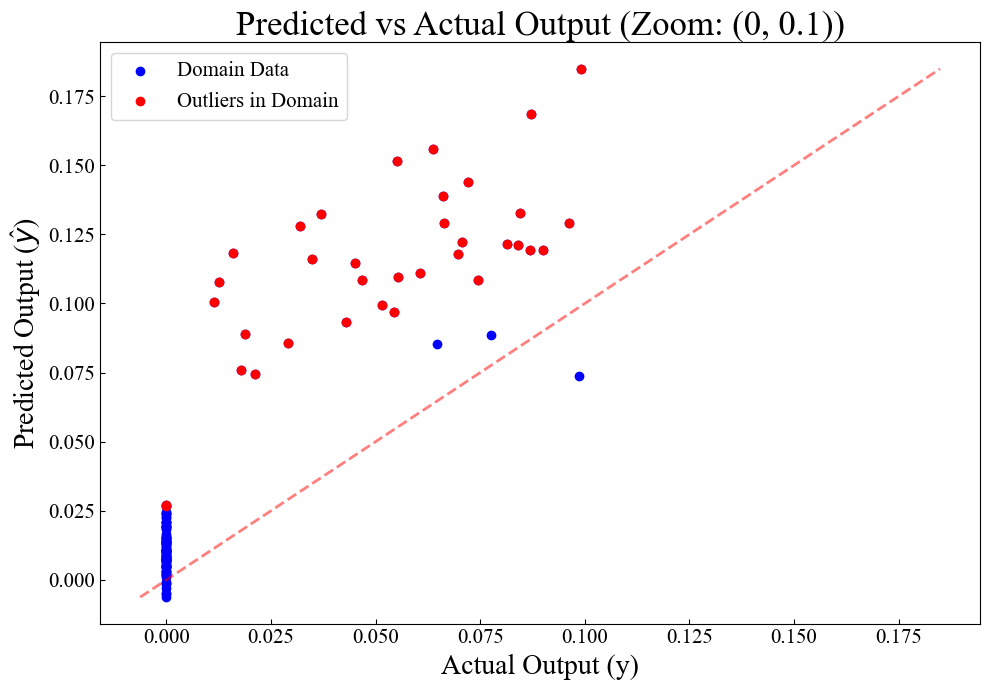

Unsorted Outliers DataFrame:
           id    y_true    y_pred  abs_error
0  mp-1033791  0.042826  0.093195   0.050369
1  mp-1033847  0.096334  0.129071   0.032738
2  mp-1033868  0.021185  0.074324   0.053139
3  mp-1033888  0.051443  0.099367   0.047924
4  mp-1033949  0.055454  0.109585   0.054132

Top 10 Outliers by Absolute Error:
            id    y_true    y_pred  abs_error
33  mp-1539400  0.015834  0.118433   0.102599
25  mp-1040852  0.055087  0.151433   0.096346
34   mp-778824  0.031957  0.128137   0.096180
21  mp-1040801  0.036849  0.132243   0.095394
24  mp-1040835  0.012587  0.107607   0.095019
30  mp-1445093  0.063728  0.155830   0.092101
27  mp-1218564  0.011405  0.100435   0.089030
22  mp-1040816  0.099169  0.184888   0.085719
28  mp-1247672  0.034763  0.116237   0.081475
11  mp-1035434  0.087138  0.168390   0.081252

Bottom 10 Outliers by Absolute Error:
            id    y_true    y_pred  abs_error
3   mp-1033888  0.051443  0.099367   0.047924
8   mp-1034739  0.054497  0.

In [557]:
# ids = factor_df.index or your MPIDs, y and y_pred as before
df_ranked= analysis_helpers.analyze_outliers_over_domain(
    y_true=y, 
    y_pred=y_pred, 
    ids=factor_df.index, 
    threshold=0.025,  # or None if you just want the top 10
    domain=(0, 0.1),  # Adjust the domain as needed
)
print("Unsorted Outliers DataFrame:")
print(df_ranked.head())

print("\nTop 10 Outliers by Absolute Error:")
df_sorted = df_ranked.sort_values(by="abs_error", ascending=False)
print(df_sorted.head(10))

print("\nBottom 10 Outliers by Absolute Error:")
print(df_sorted.tail(10))

In [558]:
# Example usage:
mp_ids = ["mp-1539400", "mp-1040852", "mp-778824", "mp-1522086"]  # your list here
analysis_helpers.plot_anisotropy_bars_all(factor_df, spectra_df, mp_ids, y_pred)


Could not plot mp-1539400: "None of [Index(['Aniso QM 1/r^7 0', 'Aniso QM 1/r^7 1', 'Aniso QM 1/r^7 2',\n       'Aniso QM 1/r^7 3', 'Aniso QM 1/r^7 4', 'Aniso QM 1/r^7 5',\n       'Aniso QM 1/r^7 6', 'Aniso QM 1/r^7 7', 'Aniso QM 1/r^7 8'],\n      dtype='object')] are in the [index]"
Could not plot mp-1040852: "None of [Index(['Aniso QM 1/r^7 0', 'Aniso QM 1/r^7 1', 'Aniso QM 1/r^7 2',\n       'Aniso QM 1/r^7 3', 'Aniso QM 1/r^7 4', 'Aniso QM 1/r^7 5',\n       'Aniso QM 1/r^7 6', 'Aniso QM 1/r^7 7', 'Aniso QM 1/r^7 8'],\n      dtype='object')] are in the [index]"
Could not plot mp-778824: "None of [Index(['Aniso QM 1/r^7 0', 'Aniso QM 1/r^7 1', 'Aniso QM 1/r^7 2',\n       'Aniso QM 1/r^7 3', 'Aniso QM 1/r^7 4', 'Aniso QM 1/r^7 5',\n       'Aniso QM 1/r^7 6', 'Aniso QM 1/r^7 7', 'Aniso QM 1/r^7 8'],\n      dtype='object')] are in the [index]"
Could not plot mp-1522086: "None of [Index(['Aniso QM 1/r^7 0', 'Aniso QM 1/r^7 1', 'Aniso QM 1/r^7 2',\n       'Aniso QM 1/r^7 3', 'Aniso QM 1/r^

### Check outliers at zero

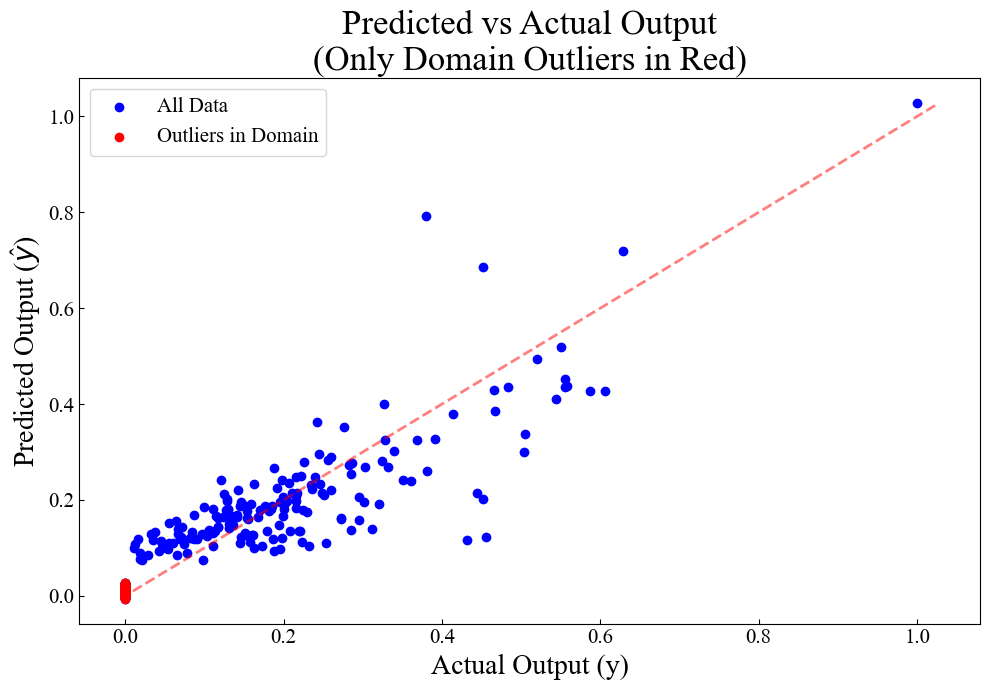

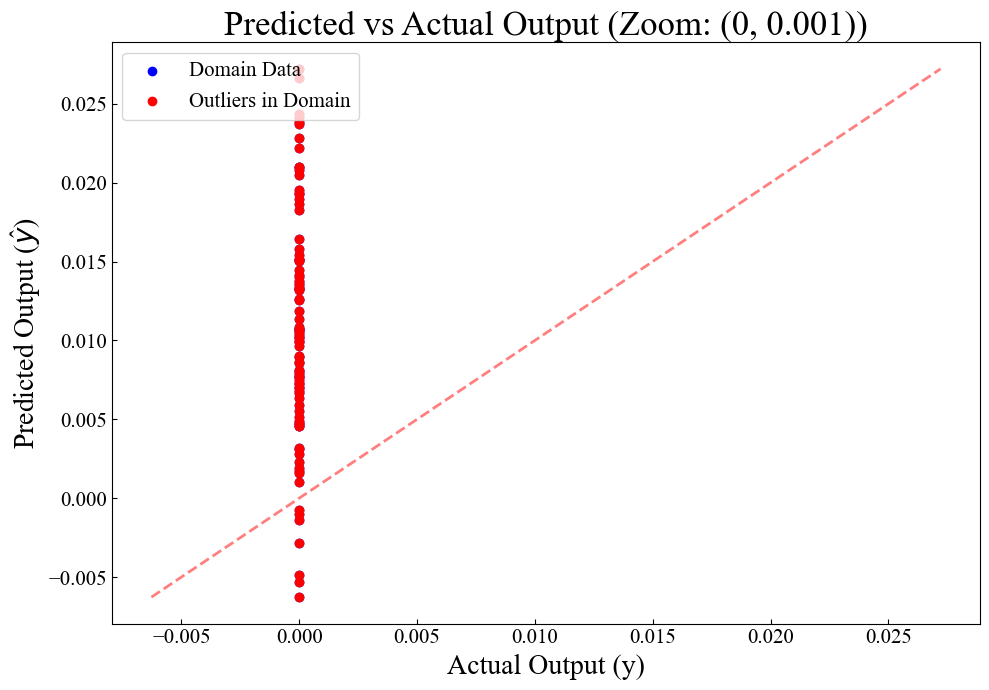


Zero Outliers DataFrame:

Top 10 Zero Outliers by Absolute Error:
            id  y_true    y_pred  abs_error
59  mp-1520536     0.0  0.027216   0.027216
74  mp-1522086     0.0  0.026626   0.026626
77  mp-1522297     0.0  0.024380   0.024380
7   mp-1185311     0.0  0.024161   0.024161
32  mp-1517681     0.0  0.023828   0.023828
58  mp-1520463     0.0  0.023711   0.023711
41  mp-1518505     0.0  0.022816   0.022816
2   mp-1076642     0.0  0.022199   0.022199
53  mp-1519678     0.0  0.020989   0.020989
0   mp-1024044     0.0  0.020966   0.020966

Bottom 10 Zero Outliers by Absolute Error:
            id  y_true    y_pred  abs_error
62  mp-1520876     0.0 -0.002821   0.002821
79  mp-1522588     0.0  0.002810   0.002810
82  mp-1523008     0.0  0.002312   0.002312
90   mp-754941     0.0  0.001923   0.001923
83  mp-1523067     0.0  0.001749   0.001749
91   mp-866101     0.0  0.001609   0.001609
46  mp-1518805     0.0 -0.001390   0.001390
72  mp-1522051     0.0  0.001047   0.001047
21  mp-15

In [559]:
df_zero_outliers = analysis_helpers.analyze_outliers_over_domain(
    y_true=y, 
    y_pred=y_pred, 
    ids=factor_df.index, 
    threshold=0,  # or None if you just want the top 10
    domain=(0, 0.001)  # Adjust the domain as needed
)

print("\nZero Outliers DataFrame:")
df_zero_outliers_sorted = df_zero_outliers.sort_values(by="abs_error", ascending=False)

print("\nTop 10 Zero Outliers by Absolute Error:")
print(df_zero_outliers_sorted.head(10))

print("\nBottom 10 Zero Outliers by Absolute Error:")
print(df_zero_outliers_sorted.tail(10))

### Check zero outlier QAM and SAM

In [560]:
# Example usage:
mp_ids = ["mp-1520536", "mp-1522086", "mp-1518767", "mp-1516991"]  # your list here
analysis_helpers.plot_anisotropy_bars_all(factor_df, spectra_df, mp_ids, y_pred)

Could not plot mp-1520536: "None of [Index(['Aniso QM 1/r^7 0', 'Aniso QM 1/r^7 1', 'Aniso QM 1/r^7 2',\n       'Aniso QM 1/r^7 3', 'Aniso QM 1/r^7 4', 'Aniso QM 1/r^7 5',\n       'Aniso QM 1/r^7 6', 'Aniso QM 1/r^7 7', 'Aniso QM 1/r^7 8'],\n      dtype='object')] are in the [index]"
Could not plot mp-1522086: "None of [Index(['Aniso QM 1/r^7 0', 'Aniso QM 1/r^7 1', 'Aniso QM 1/r^7 2',\n       'Aniso QM 1/r^7 3', 'Aniso QM 1/r^7 4', 'Aniso QM 1/r^7 5',\n       'Aniso QM 1/r^7 6', 'Aniso QM 1/r^7 7', 'Aniso QM 1/r^7 8'],\n      dtype='object')] are in the [index]"
Could not plot mp-1518767: "None of [Index(['Aniso QM 1/r^7 0', 'Aniso QM 1/r^7 1', 'Aniso QM 1/r^7 2',\n       'Aniso QM 1/r^7 3', 'Aniso QM 1/r^7 4', 'Aniso QM 1/r^7 5',\n       'Aniso QM 1/r^7 6', 'Aniso QM 1/r^7 7', 'Aniso QM 1/r^7 8'],\n      dtype='object')] are in the [index]"
Could not plot mp-1516991: "None of [Index(['Aniso QM 1/r^7 0', 'Aniso QM 1/r^7 1', 'Aniso QM 1/r^7 2',\n       'Aniso QM 1/r^7 3', 'Aniso QM 1/r

### Notes

- Most wrong preds have SAM different from QAM
- Need to check what the correct predictions look like
- Why is SAM matrix elements larger then QAM if QAM is zero shouldnt SAMS how can SAMS be non zero if QAMS is zero
- Why does the model predict such large SAMS
- Can we ever have the case where QAM is non zero with SAM zero
- Why arent the spectra sums zero??
- Could have a classifier (isotropic or anisotropic)
- Could we just provide a model a structure and have it learn on that??

#### Check outliers where y true is zero but the prediction is not

In [561]:
# Collect outliers where y_true is zero but the prediction is not
y_outliers = []

for i, txt in enumerate(y_pred.index):
    if y.iloc[i] == 0 and y_pred.iloc[i] != 0:
        diff = abs(y_pred.iloc[i] - y.iloc[i])
        y_outliers.append((txt, y.iloc[i], y_pred.iloc[i], diff))

# Sort outliers by descending difference
y_outliers.sort(key=lambda x: x[3], reverse=True)

# Print header
print("Material abs_diff")

# Print sorted results
for txt, y_true, y_hat, diff in y_outliers:
    print(f"{txt} {diff:.4f}")

Material abs_diff
mp-1520536 0.0272
mp-1522086 0.0266
mp-1522297 0.0244
mp-1185311 0.0242
mp-1517681 0.0238
mp-1520463 0.0237
mp-1518505 0.0228
mp-1076642 0.0222
mp-1519678 0.0210
mp-1024044 0.0210
mp-1076732 0.0208
mp-1522185 0.0205
mp-1521441 0.0196
mp-1522443 0.0194
mp-1516519 0.0193
mp-1521877 0.0190
mp-1522114 0.0187
mp-1516332 0.0183
mp-1520664 0.0164
mp-1517440 0.0158
mp-1516242 0.0154
mp-1517794 0.0151
mp-1521763 0.0151
mp-1517088 0.0151
mp-1516437 0.0150
mp-1076360 0.0145
mp-1517157 0.0142
mp-1183696 0.0140
mp-1519369 0.0137
mp-1520949 0.0136
mp-19062 0.0135
mp-1183712 0.0134
mp-19353 0.0133
mp-1517268 0.0132
mp-1519529 0.0132
mp-1519085 0.0127
mp-1516756 0.0125
mp-1521852 0.0118
mp-1520342 0.0114
mp-19257 0.0109
mp-1521154 0.0107
mp-1516227 0.0107
mp-1516260 0.0106
mp-1518073 0.0106
mp-1517595 0.0105
mp-1517793 0.0104
mp-1516623 0.0102
mp-1522060 0.0102
mp-1518480 0.0100
mp-1518389 0.0099
mp-1517421 0.0097
mp-1517668 0.0090
mp-1520105 0.0090
mp-1520359 0.0086
mp-1518655 0.008

Check for succesful predictions at x = 0

In [562]:
# Compute absolute difference
diffs = (y_pred - y).abs()

# Combine into one DataFrame
results = pd.DataFrame({
    "y_true": y,
    "y_pred": y_pred,
    "abs_diff": diffs
})

# Sort by difference if you'd like (e.g. descending error)
results_sorted = results.sort_values(by="abs_diff", ascending=False)

# Print top N mismatches or matches
print(results_sorted.tail(10))  # or tail(10) for smallest errors

# Define a tolerance
tol = 0.01

# Filter predictions with small absolute error
good_preds = results[results["abs_diff"] <= tol]

#print(good_preds)



              y_true    y_pred  abs_diff
material                                
mp-754941   0.000000  0.001923  0.001923
mp-1523067  0.000000  0.001749  0.001749
mp-754778   0.216840  0.215230  0.001609
mp-866101   0.000000  0.001609  0.001609
mp-1518805  0.000000 -0.001390  0.001390
mp-1522051  0.000000  0.001047  0.001047
mp-1033034  0.195322  0.196331  0.001009
mp-1516991  0.000000 -0.000998  0.000998
mp-1038639  0.185529  0.186489  0.000960
mp-1518767  0.000000 -0.000770  0.000770


### Compute correlation matrix for factros that give largest r squared

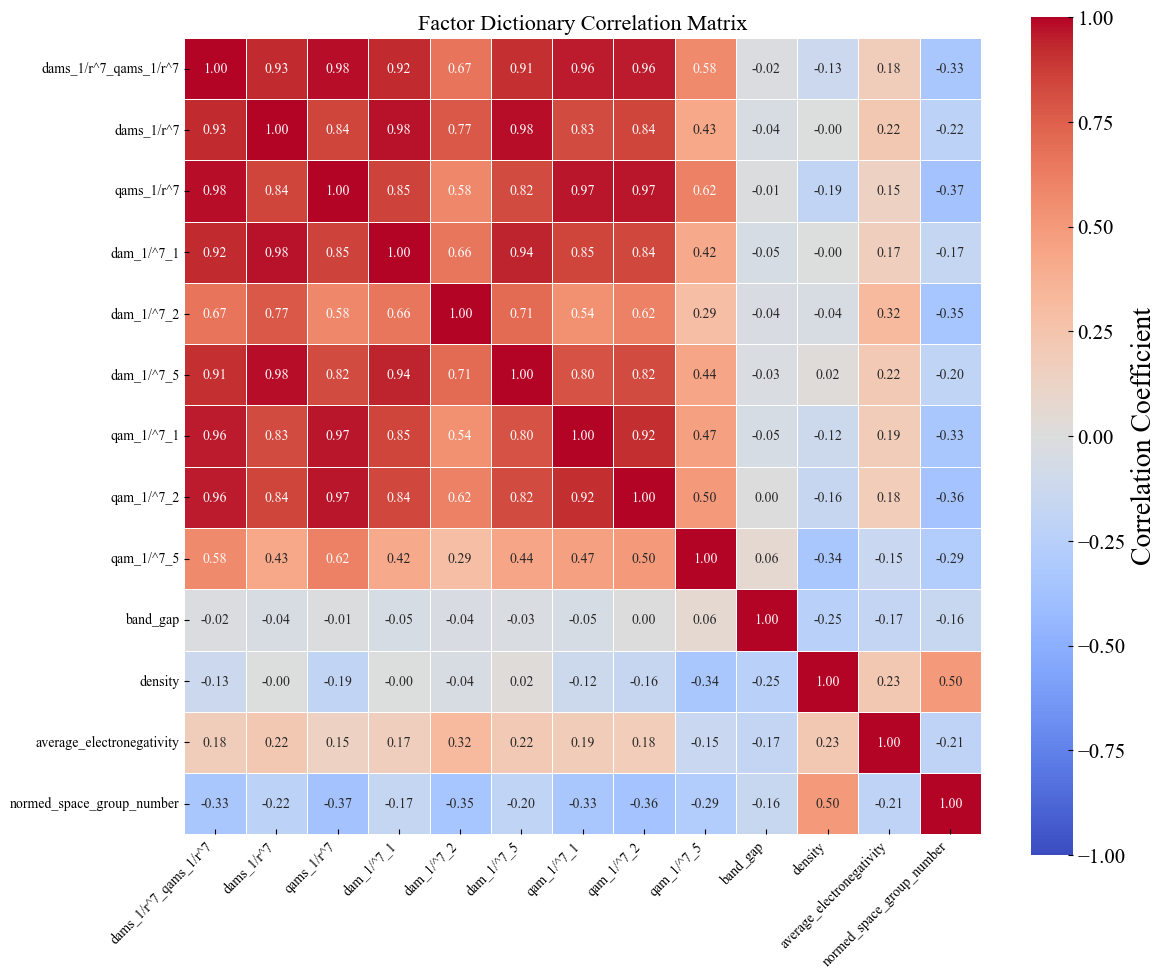

In [563]:
import seaborn as sns

columns_to_use = [
    "dams_1/r^7_qams_1/r^7", "dams_1/r^7", "qams_1/r^7",
    "dam_1/^7_1", "dam_1/^7_2", "dam_1/^7_5",
    "qam_1/^7_1", "qam_1/^7_2", "qam_1/^7_5",
    "band_gap", "density", "average_electronegativity", "normed_space_group_number"
]


# Compute the correlation matrix
factor_df_corr = factor_df[columns_to_use_1].corr()


# Set up the figure size properly
plt.figure(figsize=(12, 10))

# Use seaborn's heatmap instead of imshow for better visualization
sns.heatmap(
    factor_df_corr,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot=True,  # Displays correlation values
    fmt=".2f",   # Format values to 2 decimal places
    linewidths=0.5,  # Add grid lines for readability
    square=True,  # Ensure the heatmap is square-shaped
    cbar_kws={"label": "Correlation Coefficient"}  # Label for color bar
)

# Improve label spacing and rotation
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-labels for readability
plt.yticks(fontsize=10)  # Adjust y-label font size
plt.title("Factor Dictionary Correlation Matrix", fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

